# ENG 4000 Research Notes
## 1.1 General Buoyancy
* `Archimedes' Principle:` A body at *rest* in a fluid is acted upon by a force pushing upward called the buoyant force. It is equal to the weight of the fluid that the body displaces
    * In other words: bouyancy force you experience equals the weight of water you displaced.
* An object completely submerged in water experiences a greater buoyant force than an object that is floating on the surface of water (partial partially submerged in water). 
    * Object submerged displaces a larger volume of water because more of its surface area is underwater. This yields in a greater buoyant force.
* Recall: Water pressure increases with depth. The result of this is bouyancy:
    * The bottom of an object that is submerged in water  experiences a greate bouyant force that the top of the object. This is because pressure is greater at the bottom than at the top.
    * `Bouyant force:`
        * A force is exerted downward on the top of the object that is equal to the surface area at the top times the water pressure at the top.
        * A force is exerted upward on the bottom of the object that is equal to the water pressure at the bottom times the surface area of the bottom of the object.
        * Since the water pressure is greater at the bottom, there is a differnce in pressure, so the force at the bottom is greater. This differnce in force is the **bouyant force**.
* Buoyancy force (BF) vs Weight (mg):
    * If BF `>` mg: object rises.
    * If BF `<` mg: object sinks.
    * If BS `=` mg: object remains.
* Object's Density ($\rho$):
    * $\rho_{object}$ `<` $\rho_{water}$: object rises.
    * $\rho_{object}$ `>` $\rho_{water}$: object sinks.
    * $\rho_{object}$ `=` $\rho_{water}$: object remains.

## 1.2 Buoyancy Relationships
* Archimedes' principle states that the buoyancy force is equal to the mass of water that is displaced - mathematically:

$$
F_{B} = m_{water} \times g = (\rho_{water} \times V_{water}) g
$$

$$
V_{water} = V_{object} \implies V_{object} = \frac{m_{object}}{\rho_{object}}
$$

$$
\therefore F_{B} = (\frac{\rho_{water}}{\rho_{object}}) \times m_{object} \times g
$$

* `KEY:` *The bouyancy force is not dependent on the depth that the object is submerged in water.*
    * Hence, an object that is deeper experiences the same buoyant force that the same object would at a lower depth.
    
* * *

* The speed at which an object rises due to the bouyant force takes into account the bouyany force, the weight of the object, and the drag force experienced by the object.
    * Assumption: The density of the object is less than the density of water.
    
$$
F_{d} = \frac{1}{2} \rho v^2_{object} C_{D} A_{object}
$$

$$
F_{object} = -mg + (\frac{\rho_{water}}{\rho_{object}}) \times m_{object} \times g - \frac{1}{2} \rho_{object} v^2_{object} C_{D} A_{object}
$$

$$
\therefore v_{obj} = \sqrt{\frac{2(mg - [(\frac{\rho_{water}}{\rho_{obj}}) \times m_{obj} g])}{\rho_{obj} C_{D} A_{obj}}}
$$

> Where $C_{d}$ is the drag coefficient of the object which is dependent on its shape.

#### Table of Drag Coefficients for Shapes

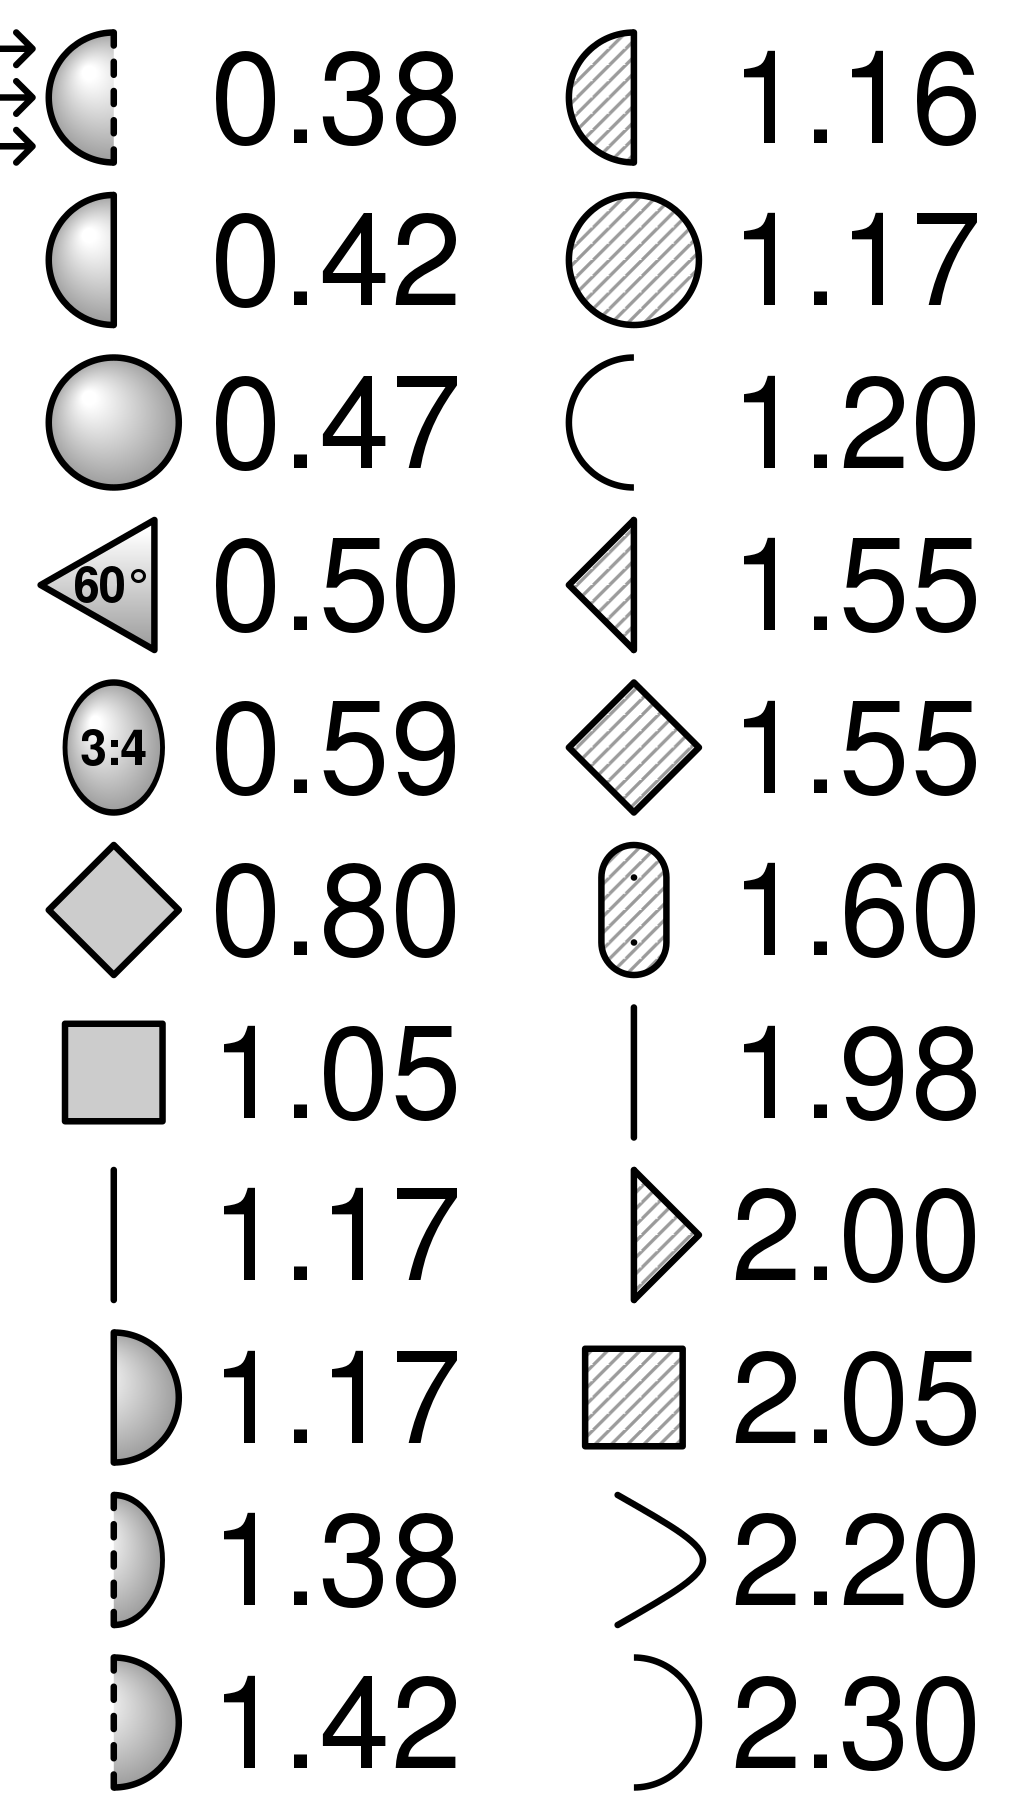

 Drag Coefficients

In [1]:
from IPython.display import Image, display, Markdown

filePath = 'Figures/DragCoefficients.png'
fig1 = Image(filename=filePath, width=170)
cap1 = Markdown(data=" Drag Coefficients")
display(fig1, cap1)

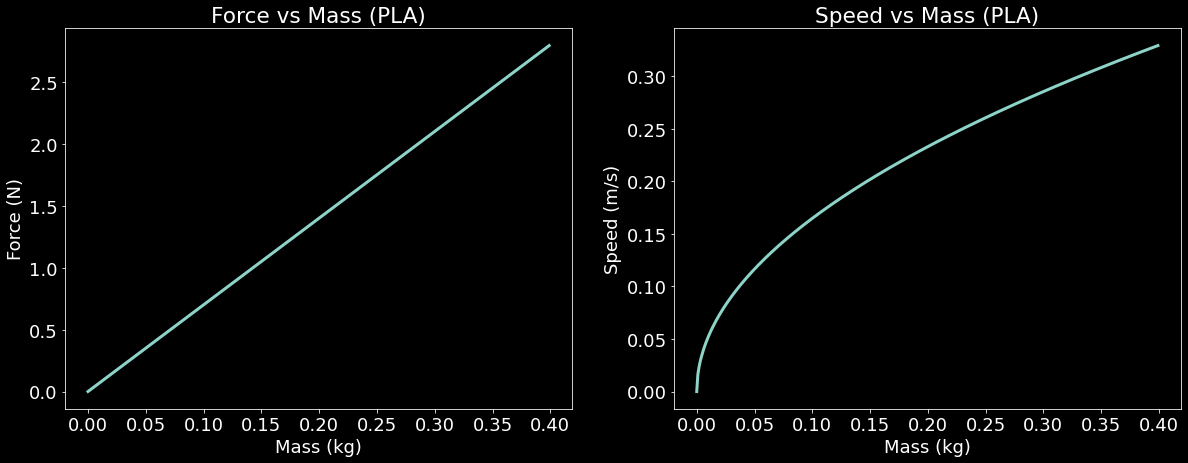

In [7]:
# Library imports
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('dark_background')
plt.rcParams.update({'font.size': 18})

# Constants
p_w = 1000 # kg/m^3
g = 9.81 # N/m^2
p_pla = 1400 # PLA kg/m^3

minMass = 0
maxMass = 0.4 # kg
mass_step = 0.001

d = 0.1 #m

A = 4 * np.pi * (d/2)**2 # Sphere shape
cd = 0.47 # Drag coefficient for sphere

lineWidth = 3.0 # Width of line on plot

# Changing variables
m_obj = np.arange(minMass, maxMass, mass_step)

# Labels
labelX = ["Mass (kg)", "Mass (kg)"]
labelY = ["Force (N)", "Speed (m/s)"]
titles = ["Force vs Mass (PLA)", "Speed vs Mass (PLA)"]

# Calculations
F_b = (p_w / p_pla) * m_obj * g
v_obj = np.sqrt(( 2*(m_obj*g - ((p_w/p_pla)*m_obj*g)) ) / (p_pla*cd*A))

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

axes[0].plot(m_obj, F_b, linewidth=lineWidth)
axes[1].plot(m_obj, v_obj, linewidth=lineWidth)

axes[-1].grid()
axes[1].grid()

for i in range(len(axes)):
    axes[i].set(xlabel=labelX[i], ylabel=labelY[i], title=titles[i])
    

### 1.2.1 Key Takeaways from Graphs
#### Force vs Mass
* As the mass increases, we can see that the buoyant force increases as well (Linear):
    * Because we use the density of PLA, which is unchanged in the calculation, an increase in mass means that the volume must also increase to keep the density of PLA constant, due to the inverse propotionality relationship between density and volume.
    * Therefore, if we want to increase the buoyant force exerted on the submerged mass, we must increase the mass, thus the volume as well. This makes sense because the suerface area submerged increases which then displaces more water, thus obeying Archimedes' principle.
        * Reason for wanting a greater buoyant force: It will increase the speed at which it surfaces, thus controller the rotational **speed of the generator** and the **power per unit time.**

#### Speed vs Mass
* As the mass increases, the max speed (terminal speed) of the mass increases (Exponential decay):
    * As the mass increases (and volume), the speed at which the mass moves upward, which is slowed due to the drag force, increases. 
    * `Importance of this graph:` If we know the maximum speed our DC motor needs to spin at (in RPMs), we can convert it to speed in **m/s**, and find the corresponding mass required to generate that speed. Using this mass and knowing the density of the material we use (i.e PLA plastic for 3D prototyping), we can compute the volume of the shape as well.
        * `Safety:` We can look at the pressure exerted on the volume, using the pressure vs graph from previous code, and see if it is close to the **Ultimate Stress** (material failure). This will tell us what depths our design is able to handle.